# STEP 1

In [4600]:
import pandas as pd
import matplotlib.pyplot as plt

In [4601]:
data = pd.read_csv('dataset.csv')
data.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [4602]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [4603]:
data['f1'] = pd.to_numeric(data['f1'], errors='coerce')
data['f2'] = pd.to_numeric(data['f2'], errors='coerce')
data['f3'] = pd.to_numeric(data['f3'], errors='coerce')
data['f4'] = pd.to_numeric(data['f4'], errors='coerce')
data['f5'] = pd.to_numeric(data['f5'], errors='coerce')
data['f6'] = pd.to_numeric(data['f6'], errors='coerce')
data['f7'] = pd.to_numeric(data['f7'], errors='coerce')

In [4604]:
data = data.dropna()

In [4605]:
data.shape

(760, 8)

In [4606]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


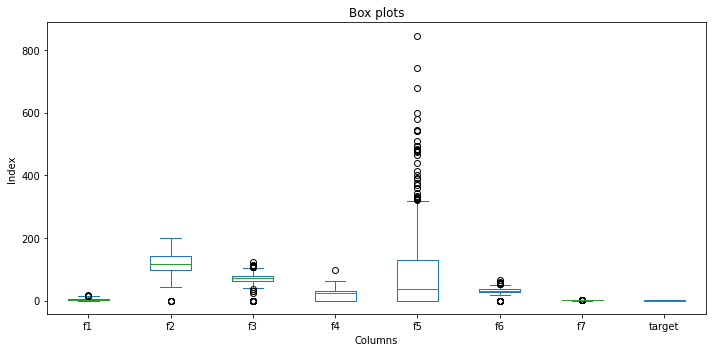

In [4607]:
data.plot.box(figsize=(10,5))
plt.xlabel("Columns")
plt.ylabel("Index")
plt.title("Box plots")
plt.tight_layout()
plt.show()

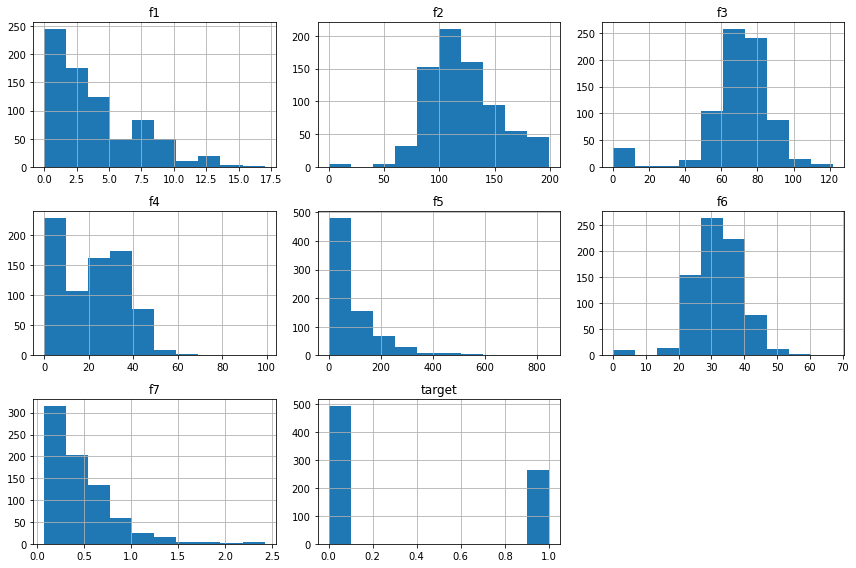

In [4608]:
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

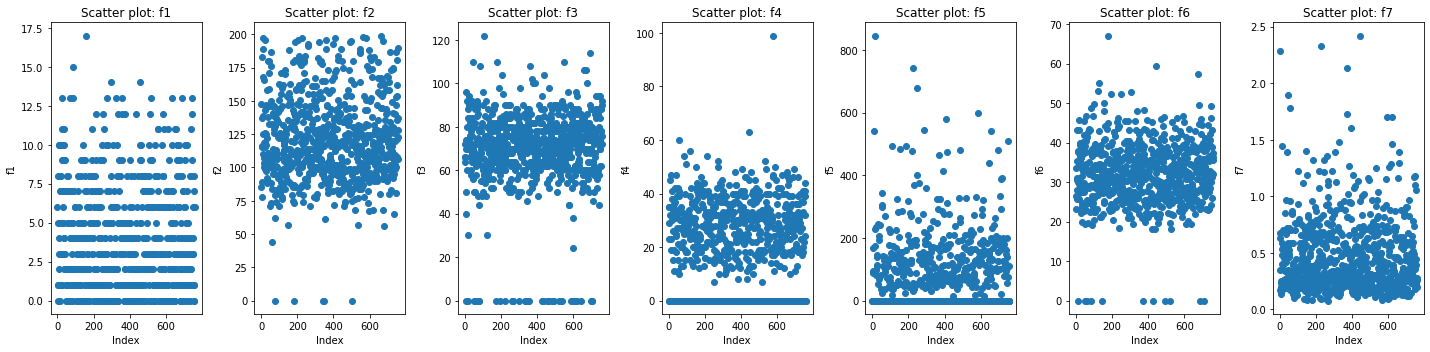

In [4609]:
fig, axes = plt.subplots(1, data.columns.__len__()-1, figsize=(20, 5))

for i, col in enumerate(data.columns):
    if col != 'target':
        axes[i].scatter(data.index, data[col])
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel(col)
        axes[i].set_title(f'Scatter plot: {col}')

plt.tight_layout()
plt.show()

In [4610]:
# Detecting outliers
# Based on the above visualizations we print number of outliers
print(f"Number of outliers in f1 =",data[data['f1'] > 13]['f1'].__len__())
print(f"Number of outliers in f2 =",data[data['f2'] < 50]['f2'].__len__())
print(f"Number of outliers in f3 =",data[(data['f3'] < 40) | (data['f3'] > 100)].__len__())
print(f"Number of outliers in f4 =",data[data['f4'] > 55]['f4'].__len__())
print(f"Number of outliers in f5 =",data[data['f5'] > 400]['f5'].__len__())
print(f"Number of outliers in f6 =",data[(data['f6'] < 5) | (data['f6'] > 50)].__len__())
print(f"Number of outliers in f7 =",data[data['f7'] > 1.5]['f7'].__len__())

Number of outliers in f1 = 4
Number of outliers in f2 = 6
Number of outliers in f3 = 52
Number of outliers in f4 = 4
Number of outliers in f5 = 20
Number of outliers in f6 = 19
Number of outliers in f7 = 10


In [4611]:
# Removing Outliers
data = data[data['f1'] < 13]
data = data[data['f2'] > 50]
data = data[data['f3'].between(40,100, inclusive='both')]
data = data[data['f4'] < 55]
data = data[data['f5'] < 400]
data = data[data['f6'].between(5,50, inclusive='both')]
data = data[data['f7'] < 1.5]

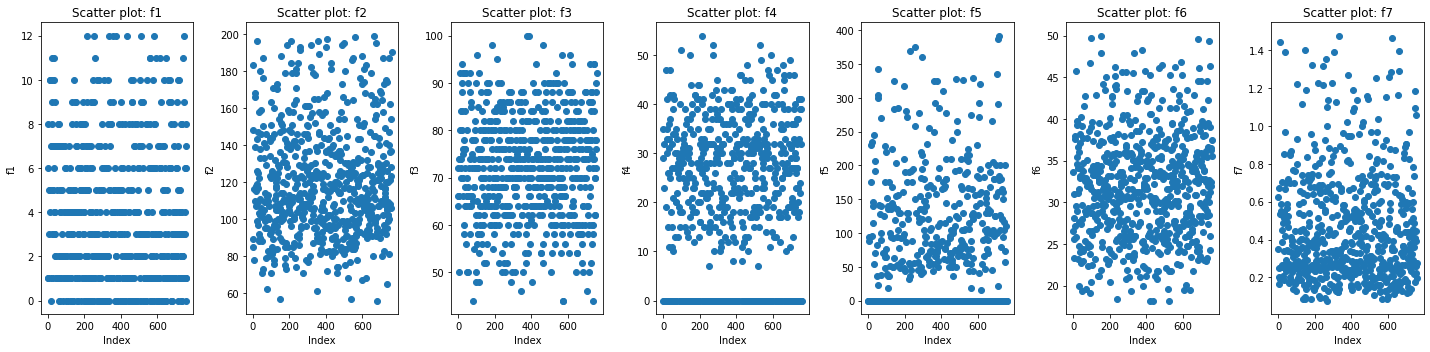

In [4612]:
fig, axes = plt.subplots(1, data.columns.__len__()-1, figsize=(20, 5))

for i, col in enumerate(data.columns):
    if col != 'target':
        axes[i].scatter(data.index, data[col])
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel(col)
        axes[i].set_title(f'Scatter plot: {col}')

plt.tight_layout()
plt.show()

In [4613]:
# Normalization
# Normalization is needed in all features as the scale between column varies a lot
for col in data.columns:
    if col != 'target':
        data[col] = ((data[col] - data[col].min())/(data[col].max()-data[col].min())).round(2)

In [4614]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.309679,0.449266,0.498807,0.383654,0.184664,0.433502,0.272278,0.325688
std,0.258821,0.208117,0.195607,0.281404,0.227177,0.201435,0.206465,0.468990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080000,0.300000,0.360000,0.000000,0.000000,0.290000,0.120000,0.000000
50%,0.250000,0.410000,0.500000,0.430000,0.110000,0.430000,0.210000,0.000000
75%,0.500000,0.577500,0.640000,0.590000,0.320000,0.560000,0.380000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4615]:
data.to_csv('./datasets_processed/datasetProcessed.csv', index=False)

# STEP 2

In [4616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import torch
import torch.nn as nn
import torch.optim as optim
import torchinfo
import time
from torchmetrics.classification import BinaryAccuracy
from torchmetrics.classification import BinaryConfusionMatrix
from torchmetrics.classification import BinaryROC

In [4617]:
dataPost = pd.read_csv('./datasets_processed/datasetProcessed.csv')
dataPost.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,0.50,0.64,0.50,0.65,0.00,0.48,0.39,1
1,0.08,0.20,0.39,0.54,0.00,0.26,0.20,0
2,0.67,0.89,0.36,0.00,0.00,0.16,0.42,1
3,0.08,0.23,0.39,0.43,0.24,0.31,0.06,0
4,0.42,0.42,0.54,0.00,0.00,0.23,0.09,0


In [4618]:
dataPost.shape

(654, 8)

In [4619]:
X = dataPost.iloc[:, :-1] #Features
y = dataPost.iloc[:, -1] #Target

In [4620]:
# Dataset split into training, validation, and testing sets (80:10:10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4621]:
print(f"The shape of X_train is =", X_train.shape)
print(f"The shape of X_valid is =", X_valid.shape)
print(f"The shape of X_test is =", X_test.shape)
print(f"The shape of y_train is =", y_train.shape)
print(f"The shape of y_valid is =", y_valid.shape)
print(f"The shape of y_test is =", y_test.shape)

The shape of X_train is = (523, 7)
The shape of X_valid is = (65, 7)
The shape of X_test is = (66, 7)
The shape of y_train is = (523,)
The shape of y_valid is = (65,)
The shape of y_test is = (66,)


In [4622]:
# Pandas dataframes to pyTorch tensors
X_train_tensor, X_valid_tensor, X_test_tensor = torch.Tensor(X_train.values), torch.Tensor(X_valid.values), torch.Tensor(X_test.values)
y_train_tensor, y_valid_tensor, y_test_tensor = torch.Tensor(y_train.values).unsqueeze(1), torch.Tensor(y_valid.values).unsqueeze(1), torch.Tensor(y_test.values).unsqueeze(1)

In [4623]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear_relu = nn.Sequential(
            nn.Linear(7, 128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear_relu(x)
        x = self.sigmoid(x)
        return x

In [4624]:
model = NeuralNetwork(dropout=0.5, activationFunc=nn.ReLU())
print(model)

NeuralNetwork(
  (linear_relu): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
  (sigmoid): Sigmoid()
)


In [4625]:
# Torchinfo Summary
torchinfoSummary = torchinfo.summary(model, input_size=(1,7)) #batch size= 1 and input size= 7
print(torchinfoSummary)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  1,024
│    └─ReLU: 2-2                         [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─ReLU: 2-5                         [1, 64]                   --
│    └─Dropout: 2-6                      [1, 64]                   --
│    └─Linear: 2-7                       [1, 1]                    65
├─Sigmoid: 1-2                           [1, 1]                    --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04


## Model Training

In [4657]:
# Model Training
def modelTraining(epochs, batchSize, criterion, optimizer, model):
    # Start time
    startTime = time.time()

    training_loss_plt_arr = []
    validation_loss_plt_arr = []
    testing_loss_plt_arr = []

    # Training loop
    for epoch in range(epochs):
        # Set model to training mode
        model.train()
        training_loss = 0.0
        for i in range(0, len(X_train_tensor), batchSize):
            X_batch = X_train_tensor[i:batchSize+i]
            y_batch = y_train_tensor[i:batchSize+i]

            optimizer.zero_grad()
            outputs_training = model(X_batch)
            loss_training = criterion(outputs_training, y_batch)
            
            # optimizer.zero_grad()
            loss_training.backward()
            optimizer.step()
            training_loss += loss_training.item()

        # Set model to evaluation mode
        model.eval()
        with torch.no_grad():
            validation_loss = 0.0
            for i in range(0, len(X_valid_tensor), batchSize):
                X_batch_valid = X_valid_tensor[i:batchSize+i]
                y_batch_valid = y_valid_tensor[i:batchSize+i]
                
                outputs_valid = model(X_batch_valid)
                loss_validation = criterion(outputs_valid, y_batch_valid)
                validation_loss += loss_validation.item()

            testing_loss = 0.0
            for i in range(0, len(X_test_tensor), batchSize):
                X_batch_test = X_test_tensor[i:batchSize+i]
                y_batch_test = y_test_tensor[i:batchSize+i]
                
                outputs_test = model(X_batch_test)
                loss_testing = criterion(outputs_test, y_batch_test)
                testing_loss += loss_testing.item()

        print(f'Epoch {epoch+1}, Training Loss = {training_loss:.2f}, Validation Loss = {validation_loss:.2f}, Testing Loss = {testing_loss:.2f}')
        training_loss_plt_arr.append(training_loss)
        validation_loss_plt_arr.append(validation_loss)
        testing_loss_plt_arr.append(testing_loss)

    # End time
    endTime = time.time()
    time_to_train = (endTime - startTime)
    print(f"\nTime to train = {time_to_train:.2f}\n")

    # Normalize Losses for better visualisation
    training_loss_plt_arr_max = max(training_loss_plt_arr)
    training_loss_plt_arr_min = min(training_loss_plt_arr)
    validation_loss_plt_arr_max = max(validation_loss_plt_arr)
    validation_loss_plt_arr_min = min(validation_loss_plt_arr)
    testing_loss_plt_arr_max = max(testing_loss_plt_arr)
    testing_loss_plt_arr_min = min(testing_loss_plt_arr)

    training_loss_minmax_deno = training_loss_plt_arr_max - training_loss_plt_arr_min
    validation_loss_minmax_deno = validation_loss_plt_arr_max - validation_loss_plt_arr_min
    testing_loss_minmax_deno = testing_loss_plt_arr_max - testing_loss_plt_arr_min

    training_loss_plt_arr_norm = [(i - training_loss_plt_arr_min)/training_loss_minmax_deno for i in training_loss_plt_arr]
    validation_loss_plt_arr_norm = [(i - validation_loss_plt_arr_min)/validation_loss_minmax_deno for i in validation_loss_plt_arr]
    testing_loss_plt_arr_norm = [(i - testing_loss_plt_arr_min)/testing_loss_minmax_deno for i in testing_loss_plt_arr]

    # Plot the loss graph
    plt.plot(range(1, epochs+1), training_loss_plt_arr_norm, label='Training Loss', color='red')
    plt.plot(range(1, epochs+1), validation_loss_plt_arr_norm, label='Validation Loss', color='green')
    plt.plot(range(1, epochs+1), testing_loss_plt_arr_norm, label='Testing Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation vs Testing loss')
    plt.legend()
    plt.show()

## Performance Evaluation

In [4627]:
# Performance Evaluation
def perfEvaluation(model):
    model.eval()

    # Forward pass disabling Backward propagation
    with torch.no_grad():
        outputs_test = model(X_test_tensor)
        y_test_pred = (outputs_test >= 0.5)
        y_test_pred = y_test_pred.float() # Sets False->0 and True->1

        outputs_valid = model(X_valid_tensor)
        y_valid_pred = (outputs_valid >= 0.5)
        y_valid_pred = y_valid_pred.float() # Sets False->0 and True->1

        outputs_train = model(X_train_tensor)
        y_train_pred = (outputs_train >= 0.5)
        y_train_pred = y_train_pred.float() # Sets False->0 and True->1
        
    # Accuracies
    metric = BinaryAccuracy()
    test_accuracy = metric(y_test_pred, y_test_tensor)
    print(f"Accuracy = {test_accuracy:.2f}")

    valid_accuracy = metric(y_valid_pred, y_valid_tensor)
    train_accuracy = metric(y_train_pred, y_train_tensor)

    # Precision, Recall, Fscore
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test_tensor, y_test_pred, average='binary')
    print(f"Precision = {precision:.2f}")
    print(f"Recall = {recall:.2f}")
    print(f"Fscore = {fscore:.2f}")

    # Plot the Accuracies
    labels = ['Training', 'Validation', 'Test']
    accuracies = [train_accuracy, valid_accuracy, test_accuracy]
    plt.bar(labels, accuracies, color=['red', 'green', 'blue'])
    plt.xlabel('Splits')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    # Confusion Matrix
    bcm = BinaryConfusionMatrix()
    bcm(y_test_pred, y_test_tensor)
    bcm.plot()
    plt.show()

    #ROC Curve
    broc = BinaryROC()
    y_test_tensor_long = y_test_tensor.to(torch.long)
    broc(y_test_pred, y_test_tensor_long)
    broc.plot(score=True)
    plt.show()    

Epoch 1, Training Loss = 21.67, Validation Loss = 3.80, Testing Loss = 2.97
Epoch 2, Training Loss = 20.55, Validation Loss = 3.71, Testing Loss = 2.85
Epoch 3, Training Loss = 19.45, Validation Loss = 3.51, Testing Loss = 2.72
Epoch 4, Training Loss = 17.98, Validation Loss = 3.24, Testing Loss = 2.57
Epoch 5, Training Loss = 17.07, Validation Loss = 3.03, Testing Loss = 2.48
Epoch 6, Training Loss = 16.33, Validation Loss = 2.86, Testing Loss = 2.42
Epoch 7, Training Loss = 15.92, Validation Loss = 2.82, Testing Loss = 2.40
Epoch 8, Training Loss = 15.93, Validation Loss = 2.75, Testing Loss = 2.39
Epoch 9, Training Loss = 15.69, Validation Loss = 2.76, Testing Loss = 2.34
Epoch 10, Training Loss = 15.36, Validation Loss = 2.75, Testing Loss = 2.33
Epoch 11, Training Loss = 15.68, Validation Loss = 2.75, Testing Loss = 2.31


Epoch 12, Training Loss = 15.23, Validation Loss = 2.73, Testing Loss = 2.34
Epoch 13, Training Loss = 15.10, Validation Loss = 2.71, Testing Loss = 2.34
Epoch 14, Training Loss = 14.96, Validation Loss = 2.67, Testing Loss = 2.37
Epoch 15, Training Loss = 15.50, Validation Loss = 2.70, Testing Loss = 2.35
Epoch 16, Training Loss = 15.09, Validation Loss = 2.75, Testing Loss = 2.35
Epoch 17, Training Loss = 15.19, Validation Loss = 2.66, Testing Loss = 2.37
Epoch 18, Training Loss = 15.44, Validation Loss = 2.68, Testing Loss = 2.35
Epoch 19, Training Loss = 15.01, Validation Loss = 2.73, Testing Loss = 2.36
Epoch 20, Training Loss = 15.40, Validation Loss = 2.69, Testing Loss = 2.38
Epoch 21, Training Loss = 14.85, Validation Loss = 2.65, Testing Loss = 2.42
Epoch 22, Training Loss = 15.25, Validation Loss = 2.69, Testing Loss = 2.39
Epoch 23, Training Loss = 15.15, Validation Loss = 2.72, Testing Loss = 2.37
Epoch 24, Training Loss = 14.99, Validation Loss = 2.76, Testing Loss = 2.37

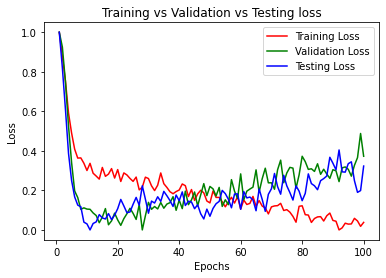

Accuracy = 0.79
Precision = 0.67
Recall = 0.60
Fscore = 0.63


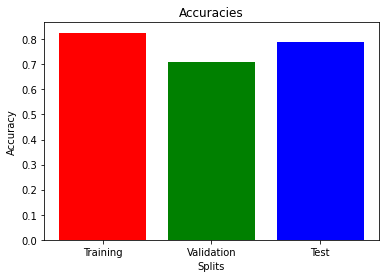

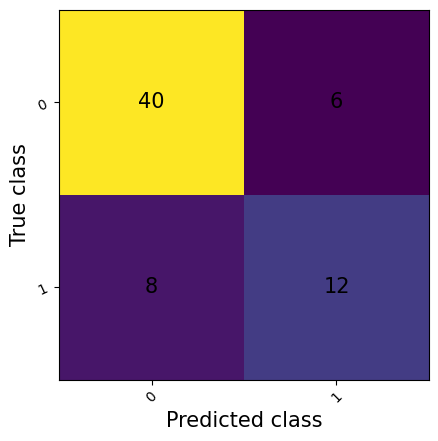

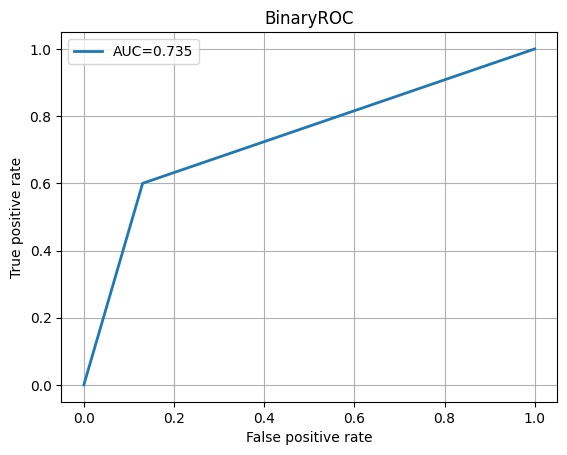

In [4628]:
# NN Model
model_I = NeuralNetwork(dropout=0.2, activationFunc=nn.ReLU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_I.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, model_I)

perfEvaluation(model_I)

# Part 2

## Modifying Hyperparameter

Epoch 1, Training Loss = 22.23, Validation Loss = 3.82, Testing Loss = 2.97
Epoch 2, Training Loss = 20.54, Validation Loss = 3.71, Testing Loss = 2.85
Epoch 3, Training Loss = 19.34, Validation Loss = 3.47, Testing Loss = 2.71
Epoch 4, Training Loss = 17.55, Validation Loss = 3.23, Testing Loss = 2.60
Epoch 5, Training Loss = 16.70, Validation Loss = 3.00, Testing Loss = 2.53
Epoch 6, Training Loss = 16.10, Validation Loss = 2.82, Testing Loss = 2.52
Epoch 7, Training Loss = 16.23, Validation Loss = 2.77, Testing Loss = 2.48
Epoch 8, Training Loss = 15.96, Validation Loss = 2.77, Testing Loss = 2.45
Epoch 9, Training Loss = 15.69, Validation Loss = 2.75, Testing Loss = 2.44
Epoch 10, Training Loss = 16.03, Validation Loss = 2.79, Testing Loss = 2.39
Epoch 11, Training Loss = 15.39, Validation Loss = 2.66, Testing Loss = 2.44
Epoch 12, Training Loss = 15.24, Validation Loss = 2.69, Testing Loss = 2.40
Epoch 13, Training Loss = 15.57, Validation Loss = 2.67, Testing Loss = 2.39
Epoch 14

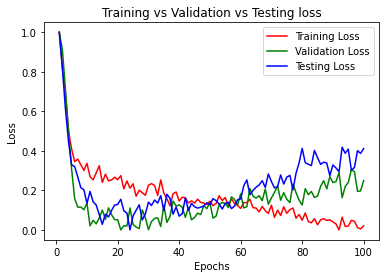

Accuracy = 0.76
Precision = 0.60
Recall = 0.60
Fscore = 0.60


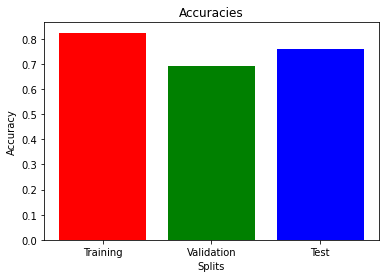

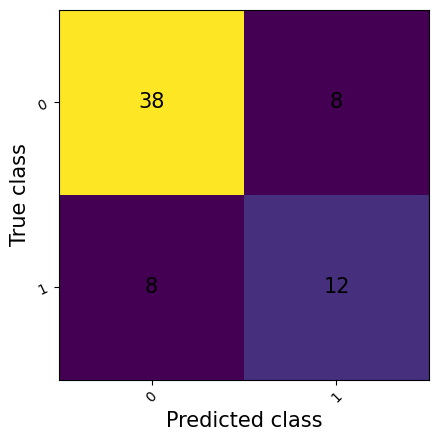

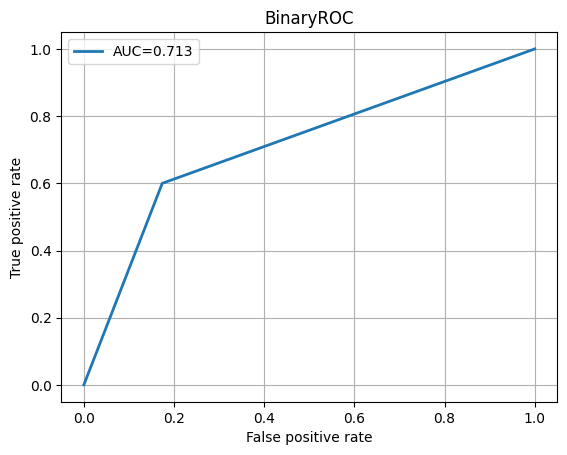

In [4629]:
# Model
hyperDropout1 = NeuralNetwork(dropout=0.25, activationFunc=nn.ReLU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperDropout1.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperDropout1)

perfEvaluation(hyperDropout1)

Epoch 1, Training Loss = 22.10, Validation Loss = 3.82, Testing Loss = 3.03
Epoch 2, Training Loss = 21.16, Validation Loss = 3.78, Testing Loss = 2.96
Epoch 3, Training Loss = 20.12, Validation Loss = 3.58, Testing Loss = 2.85
Epoch 4, Training Loss = 18.99, Validation Loss = 3.37, Testing Loss = 2.69
Epoch 5, Training Loss = 18.05, Validation Loss = 3.21, Testing Loss = 2.57
Epoch 6, Training Loss = 17.26, Validation Loss = 3.13, Testing Loss = 2.48
Epoch 7, Training Loss = 17.26, Validation Loss = 3.01, Testing Loss = 2.49
Epoch 8, Training Loss = 17.01, Validation Loss = 2.91, Testing Loss = 2.49
Epoch 9, Training Loss = 16.74, Validation Loss = 2.87, Testing Loss = 2.47
Epoch 10, Training Loss = 16.22, Validation Loss = 2.89, Testing Loss = 2.44
Epoch 11, Training Loss = 16.57, Validation Loss = 2.85, Testing Loss = 2.41
Epoch 12, Training Loss = 15.87, Validation Loss = 2.81, Testing Loss = 2.42
Epoch 13, Training Loss = 16.35, Validation Loss = 2.71, Testing Loss = 2.46
Epoch 14

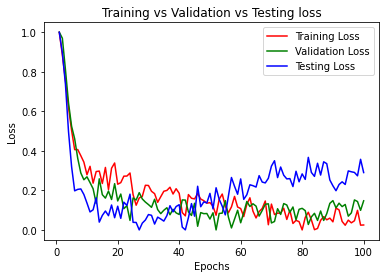

Accuracy = 0.77
Precision = 0.65
Recall = 0.55
Fscore = 0.59


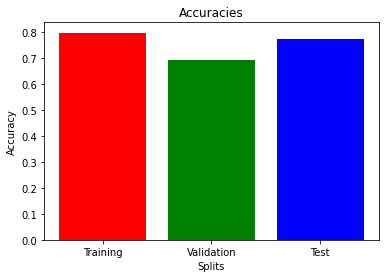

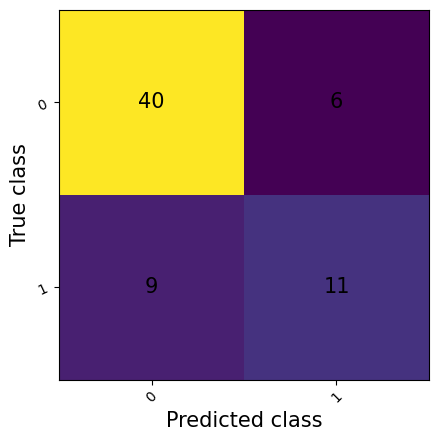

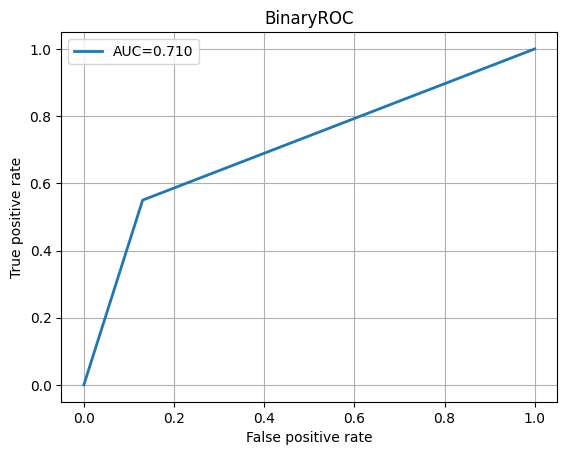

In [4630]:
# Model
hyperDropout2 = NeuralNetwork(dropout=0.5, activationFunc=nn.ReLU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperDropout2.parameters(), lr=0.001)

# Epochs and Batch size
epochsBefore = 100
batchSizeBefore = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperDropout2)

perfEvaluation(hyperDropout2)

Epoch 1, Training Loss = 22.17, Validation Loss = 3.68, Testing Loss = 3.10
Epoch 2, Training Loss = 21.78, Validation Loss = 3.73, Testing Loss = 3.03
Epoch 3, Training Loss = 21.50, Validation Loss = 3.75, Testing Loss = 2.99
Epoch 4, Training Loss = 20.67, Validation Loss = 3.79, Testing Loss = 2.94
Epoch 5, Training Loss = 21.20, Validation Loss = 3.74, Testing Loss = 2.93
Epoch 6, Training Loss = 20.61, Validation Loss = 3.65, Testing Loss = 2.91
Epoch 7, Training Loss = 20.18, Validation Loss = 3.56, Testing Loss = 2.88
Epoch 8, Training Loss = 19.99, Validation Loss = 3.58, Testing Loss = 2.83
Epoch 9, Training Loss = 19.29, Validation Loss = 3.53, Testing Loss = 2.78
Epoch 10, Training Loss = 18.56, Validation Loss = 3.45, Testing Loss = 2.74
Epoch 11, Training Loss = 18.81, Validation Loss = 3.35, Testing Loss = 2.69
Epoch 12, Training Loss = 18.46, Validation Loss = 3.20, Testing Loss = 2.67
Epoch 13, Training Loss = 18.33, Validation Loss = 3.12, Testing Loss = 2.67
Epoch 14

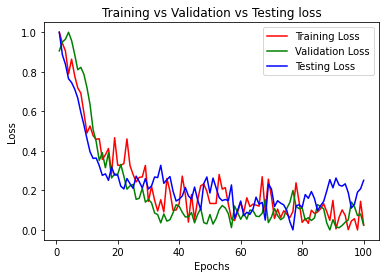

Accuracy = 0.73
Precision = 0.55
Recall = 0.55
Fscore = 0.55


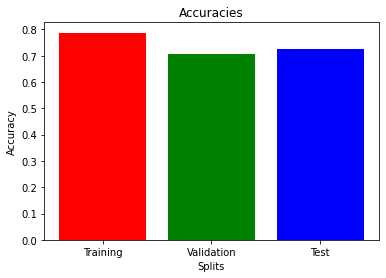

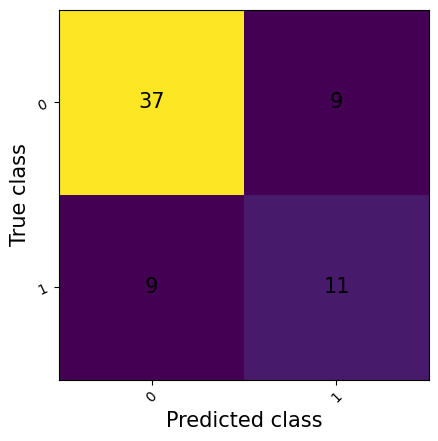

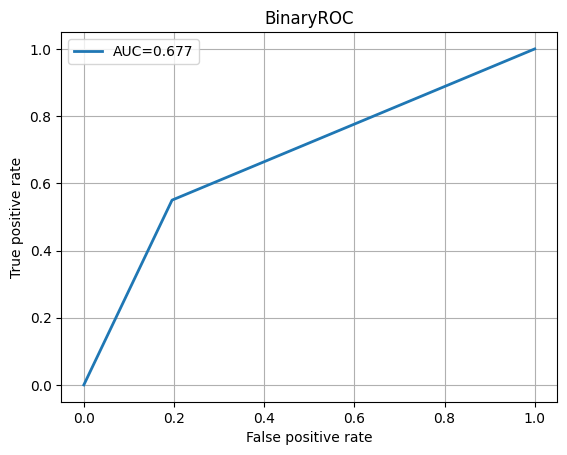

In [4631]:
# Model
hyperDropout3 = NeuralNetwork(dropout=0.75, activationFunc=nn.ReLU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperDropout3.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperDropout3)

perfEvaluation(hyperDropout3)

## Modifying Hyperparameters

Epoch 1, Training Loss = 21.94, Validation Loss = 3.78, Testing Loss = 2.97
Epoch 2, Training Loss = 20.89, Validation Loss = 3.90, Testing Loss = 2.88
Epoch 3, Training Loss = 20.75, Validation Loss = 3.84, Testing Loss = 2.85
Epoch 4, Training Loss = 20.43, Validation Loss = 3.78, Testing Loss = 2.83
Epoch 5, Training Loss = 19.89, Validation Loss = 3.75, Testing Loss = 2.78
Epoch 6, Training Loss = 19.72, Validation Loss = 3.67, Testing Loss = 2.74
Epoch 7, Training Loss = 19.12, Validation Loss = 3.51, Testing Loss = 2.68
Epoch 8, Training Loss = 18.88, Validation Loss = 3.40, Testing Loss = 2.61
Epoch 9, Training Loss = 18.52, Validation Loss = 3.16, Testing Loss = 2.61
Epoch 10, Training Loss = 18.14, Validation Loss = 3.09, Testing Loss = 2.58
Epoch 11, Training Loss = 17.59, Validation Loss = 3.05, Testing Loss = 2.53
Epoch 12, Training Loss = 17.21, Validation Loss = 2.89, Testing Loss = 2.52
Epoch 13, Training Loss = 17.37, Validation Loss = 2.89, Testing Loss = 2.53
Epoch 14

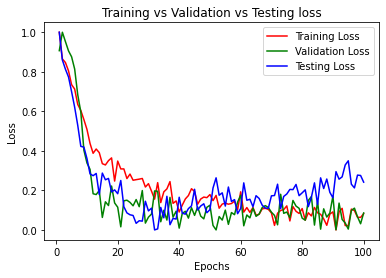

Accuracy = 0.80
Precision = 0.73
Recall = 0.55
Fscore = 0.63


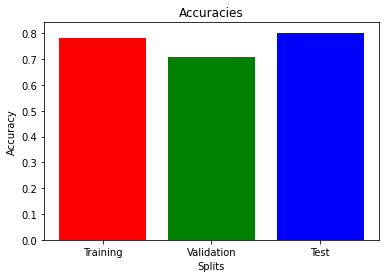

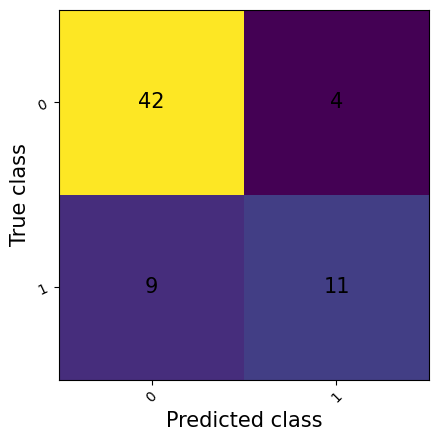

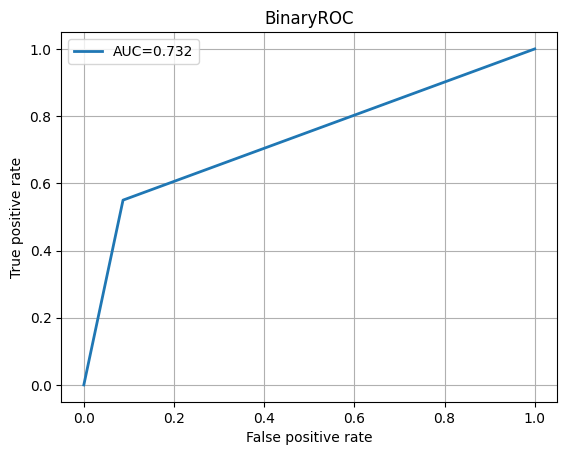

In [4632]:
# hyperModel1
hyperModel1 = NeuralNetwork(dropout=0.4, activationFunc=nn.LeakyReLU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(hyperModel1.parameters(), lr=0.01, momentum=0.9)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSizeBefore, criterion, optimizer, hyperModel1)

perfEvaluation(hyperModel1)

In [4633]:
# Torchinfo hyperModel1 Summary
torchinfoSummary = torchinfo.summary(hyperModel1, input_size=(1,7)) #batch size= 1 and input size= 7
print(torchinfoSummary)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  1,024
│    └─LeakyReLU: 2-2                    [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─LeakyReLU: 2-5                    [1, 64]                   --
│    └─Dropout: 2-6                      [1, 64]                   --
│    └─Linear: 2-7                       [1, 1]                    65
├─Sigmoid: 1-2                           [1, 1]                    --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04


Epoch 1, Training Loss = 19.70, Validation Loss = 2.85, Testing Loss = 2.84
Epoch 2, Training Loss = 17.49, Validation Loss = 2.65, Testing Loss = 2.80
Epoch 3, Training Loss = 16.82, Validation Loss = 2.59, Testing Loss = 2.70
Epoch 4, Training Loss = 16.38, Validation Loss = 2.53, Testing Loss = 2.67
Epoch 5, Training Loss = 16.12, Validation Loss = 2.46, Testing Loss = 2.74
Epoch 6, Training Loss = 16.06, Validation Loss = 2.49, Testing Loss = 2.68
Epoch 7, Training Loss = 15.87, Validation Loss = 2.55, Testing Loss = 2.57
Epoch 8, Training Loss = 15.94, Validation Loss = 2.55, Testing Loss = 2.52
Epoch 9, Training Loss = 15.87, Validation Loss = 2.49, Testing Loss = 2.55
Epoch 10, Training Loss = 16.36, Validation Loss = 2.50, Testing Loss = 2.50
Epoch 11, Training Loss = 16.34, Validation Loss = 2.57, Testing Loss = 2.50
Epoch 12, Training Loss = 15.51, Validation Loss = 2.49, Testing Loss = 2.55
Epoch 13, Training Loss = 15.43, Validation Loss = 2.59, Testing Loss = 2.41
Epoch 14

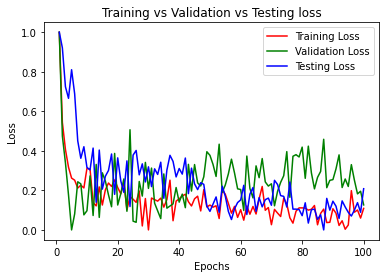

Accuracy = 0.79
Precision = 0.64
Recall = 0.70
Fscore = 0.67


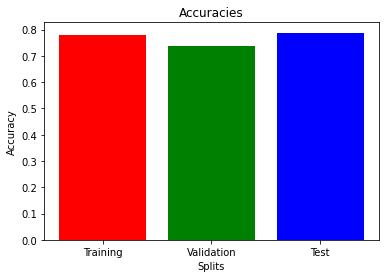

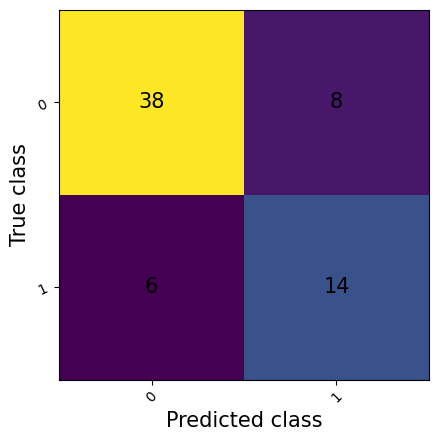

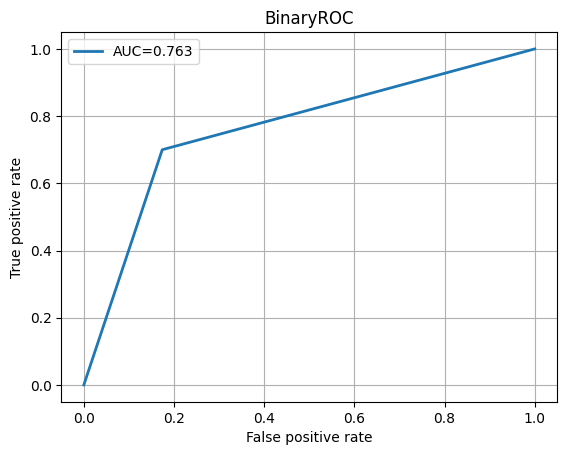

In [4634]:
# hyperModel2
hyperModel2 = NeuralNetwork(dropout=0.5, activationFunc=nn.SELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.RMSprop(hyperModel2.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSizeBefore, criterion, optimizer, hyperModel2)

perfEvaluation(hyperModel2)

In [4635]:
# Torchinfo hyperModel2 Summary
torchinfoSummary = torchinfo.summary(hyperModel2, input_size=(1,7)) #batch size= 1 and input size= 7
print(torchinfoSummary)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  1,024
│    └─SELU: 2-2                         [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─SELU: 2-5                         [1, 64]                   --
│    └─Dropout: 2-6                      [1, 64]                   --
│    └─Linear: 2-7                       [1, 1]                    65
├─Sigmoid: 1-2                           [1, 1]                    --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04


Epoch 1, Training Loss = 21.66, Validation Loss = 3.94, Testing Loss = 2.86
Epoch 2, Training Loss = 20.38, Validation Loss = 3.60, Testing Loss = 2.84
Epoch 3, Training Loss = 19.37, Validation Loss = 3.41, Testing Loss = 2.77
Epoch 4, Training Loss = 18.15, Validation Loss = 3.18, Testing Loss = 2.72
Epoch 5, Training Loss = 17.91, Validation Loss = 3.09, Testing Loss = 2.66
Epoch 6, Training Loss = 17.06, Validation Loss = 2.95, Testing Loss = 2.63
Epoch 7, Training Loss = 16.56, Validation Loss = 2.99, Testing Loss = 2.54
Epoch 8, Training Loss = 17.34, Validation Loss = 2.83, Testing Loss = 2.52
Epoch 9, Training Loss = 17.39, Validation Loss = 2.78, Testing Loss = 2.50
Epoch 10, Training Loss = 16.15, Validation Loss = 2.81, Testing Loss = 2.47
Epoch 11, Training Loss = 16.11, Validation Loss = 2.74, Testing Loss = 2.47
Epoch 12, Training Loss = 16.57, Validation Loss = 2.90, Testing Loss = 2.38
Epoch 13, Training Loss = 16.24, Validation Loss = 2.78, Testing Loss = 2.40
Epoch 14

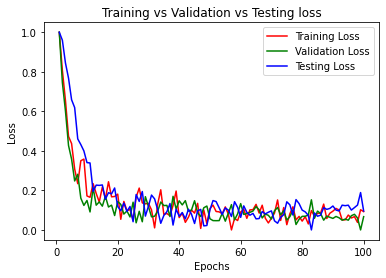

Accuracy = 0.80
Precision = 0.73
Recall = 0.55
Fscore = 0.63


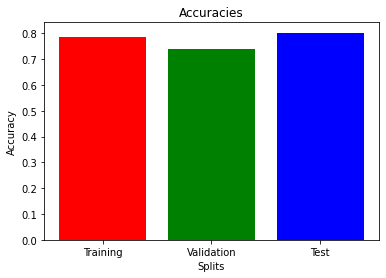

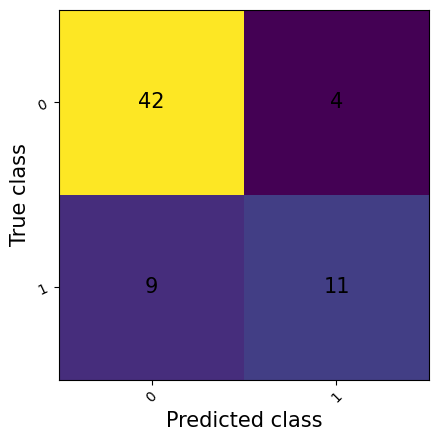

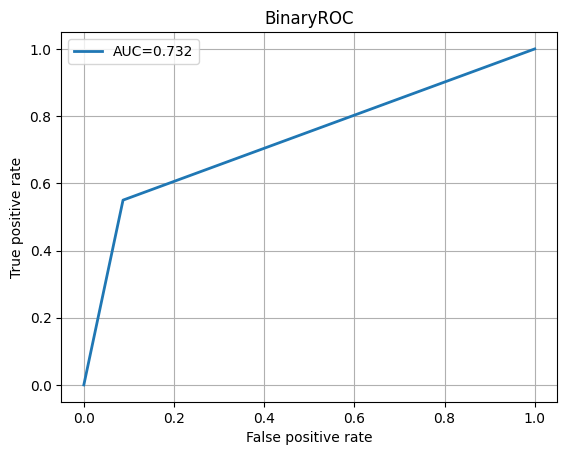

In [4636]:
# hyperModel3
hyperModel3 = NeuralNetwork(dropout=0.6, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.AdamW(hyperModel3.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSizeBefore, criterion, optimizer, hyperModel3)

perfEvaluation(hyperModel3)

In [4637]:
# Torchinfo hyperModel3 Summary
torchinfoSummary = torchinfo.summary(hyperModel3, input_size=(1,7)) #batch size= 1 and input size= 7
print(torchinfoSummary)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  1,024
│    └─ELU: 2-2                          [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─ELU: 2-5                          [1, 64]                   --
│    └─Dropout: 2-6                      [1, 64]                   --
│    └─Linear: 2-7                       [1, 1]                    65
├─Sigmoid: 1-2                           [1, 1]                    --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04


## Training optimization method

### Early Stopping

Epoch 1, Training Loss = 21.99, Validation Loss = 3.80, Testing Loss = 3.01
Epoch 2, Training Loss = 20.72, Validation Loss = 3.81, Testing Loss = 2.91
Epoch 3, Training Loss = 19.91, Validation Loss = 3.67, Testing Loss = 2.81
Epoch 4, Training Loss = 18.48, Validation Loss = 3.35, Testing Loss = 2.70
Epoch 5, Training Loss = 17.56, Validation Loss = 3.12, Testing Loss = 2.60
Epoch 6, Training Loss = 16.61, Validation Loss = 3.02, Testing Loss = 2.52
Epoch 7, Training Loss = 16.58, Validation Loss = 2.84, Testing Loss = 2.52
Epoch 8, Training Loss = 16.27, Validation Loss = 2.80, Testing Loss = 2.48
Epoch 9, Training Loss = 15.61, Validation Loss = 2.77, Testing Loss = 2.45
Epoch 10, Training Loss = 15.43, Validation Loss = 2.75, Testing Loss = 2.45
Epoch 11, Training Loss = 15.35, Validation Loss = 2.72, Testing Loss = 2.44
Epoch 12, Training Loss = 15.72, Validation Loss = 2.80, Testing Loss = 2.38
Epoch 13, Training Loss = 15.45, Validation Loss = 2.72, Testing Loss = 2.39
Epoch 14

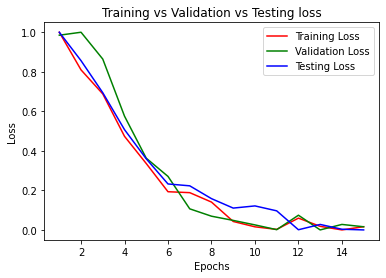

Accuracy = 0.82


In [4638]:
# NN Model
modelNN1 = NeuralNetwork(dropout=0.2, activationFunc=nn.ReLU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN1.parameters(), lr=0.001)

# Epochs and batch size
epochs = 15
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, modelNN1)

# Performance Evaluation
modelNN1.eval()

# Forward pass disabling Backward propagation
with torch.no_grad():
    outputs = modelNN1(X_test_tensor)
    y_test_pred = (outputs >= 0.5)
    y_test_pred = y_test_pred.float() # Sets False->0 and True->1

# Accuracy
metric = BinaryAccuracy()
accuracy = metric(y_test_pred, y_test_tensor)
print(f"Accuracy = {accuracy:.2f}")

### Batch Normalization

Epoch 1, Training Loss = 19.63, Validation Loss = 2.86, Testing Loss = 2.99
Epoch 2, Training Loss = 16.45, Validation Loss = 2.53, Testing Loss = 2.54
Epoch 3, Training Loss = 15.72, Validation Loss = 2.50, Testing Loss = 2.42
Epoch 4, Training Loss = 15.61, Validation Loss = 2.48, Testing Loss = 2.38
Epoch 5, Training Loss = 14.92, Validation Loss = 2.57, Testing Loss = 2.33
Epoch 6, Training Loss = 15.21, Validation Loss = 2.57, Testing Loss = 2.37
Epoch 7, Training Loss = 14.73, Validation Loss = 2.51, Testing Loss = 2.46
Epoch 8, Training Loss = 14.55, Validation Loss = 2.53, Testing Loss = 2.41
Epoch 9, Training Loss = 14.33, Validation Loss = 2.56, Testing Loss = 2.46
Epoch 10, Training Loss = 13.96, Validation Loss = 2.67, Testing Loss = 2.36
Epoch 11, Training Loss = 14.25, Validation Loss = 2.60, Testing Loss = 2.36
Epoch 12, Training Loss = 13.86, Validation Loss = 2.59, Testing Loss = 2.47
Epoch 13, Training Loss = 13.79, Validation Loss = 2.67, Testing Loss = 2.39
Epoch 14

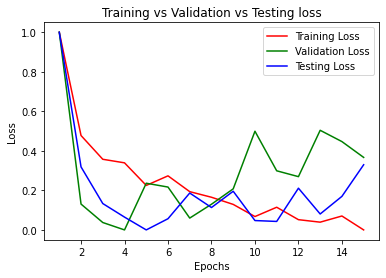

Accuracy = 0.73


In [4639]:
# NN Model
class NeuralNetwork(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear_relu = nn.Sequential(
            nn.Linear(7, 128),
            nn.BatchNorm1d(128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear_relu(x)
        x = self.sigmoid(x)
        return x

modelNN2 = NeuralNetwork(dropout=0.2, activationFunc=nn.ReLU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN2.parameters(), lr=0.001)

# Epochs and batch size
epochs = 15
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, modelNN2)

# Performance Evaluation
modelNN2.eval()

# Forward pass disabling Backward propagation
with torch.no_grad():
    outputs = modelNN2(X_test_tensor)
    y_test_pred = (outputs >= 0.5)
    y_test_pred = y_test_pred.float() # Sets False->0 and True->1

# Accuracy
metric = BinaryAccuracy()
accuracy = metric(y_test_pred, y_test_tensor)
print(f"Accuracy = {accuracy:.2f}")

### Learning rate scheduler

Epoch 1, Training Loss = 20.42, Validation Loss = 2.87, Testing Loss = 2.96
Epoch 2, Training Loss = 16.59, Validation Loss = 2.70, Testing Loss = 2.60
Epoch 3, Training Loss = 15.72, Validation Loss = 2.67, Testing Loss = 2.51
Epoch 4, Training Loss = 15.45, Validation Loss = 2.69, Testing Loss = 2.46
Epoch 5, Training Loss = 14.97, Validation Loss = 2.71, Testing Loss = 2.47
Epoch 6, Training Loss = 14.74, Validation Loss = 2.74, Testing Loss = 2.48
Epoch 7, Training Loss = 14.71, Validation Loss = 2.74, Testing Loss = 2.39
Epoch 8, Training Loss = 14.69, Validation Loss = 2.68, Testing Loss = 2.43
Epoch 9, Training Loss = 14.44, Validation Loss = 2.81, Testing Loss = 2.44
Epoch 10, Training Loss = 14.07, Validation Loss = 2.79, Testing Loss = 2.49
Epoch 11, Training Loss = 13.67, Validation Loss = 2.82, Testing Loss = 2.49
Epoch 12, Training Loss = 13.77, Validation Loss = 2.79, Testing Loss = 2.46
Epoch 13, Training Loss = 13.79, Validation Loss = 2.75, Testing Loss = 2.50
Epoch 14

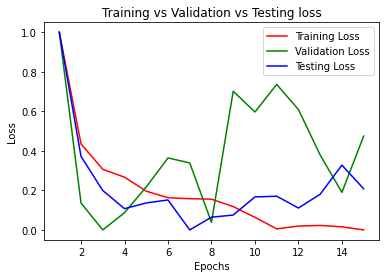

Accuracy = 0.74


In [4647]:
# NN Model
modelNN3 = NeuralNetwork(dropout=0.2, activationFunc=nn.ReLU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN3.parameters(), lr=0.001)

# Epochs and batch size
epochs = 15
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, modelNN3)

# Performance Evaluation
modelNN3.eval()

# Forward pass disabling Backward propagation
with torch.no_grad():
    outputs = modelNN3(X_test_tensor)
    y_test_pred = (outputs >= 0.5)
    y_test_pred = y_test_pred.float() # Sets False->0 and True->1

# Accuracy
metric = BinaryAccuracy()
accuracy = metric(y_test_pred, y_test_tensor)
print(f"Accuracy = {accuracy:.2f}")

In [4655]:
def modelTrainingTry(epochs, batchSize, criterion, optimizer, model):
    print(model == 'modelNN3')

In [4656]:
# NN Model
modelNN3 = NeuralNetwork(dropout=0.2, activationFunc=nn.ReLU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN3.parameters(), lr=0.001)

# Epochs and batch size
epochs = 15
batchSize = 16

modelTrainingTry(epochs, batchSize, criterion, optimizer, modelNN3)

# Performance Evaluation
# modelNN3.eval()

# # Forward pass disabling Backward propagation
# with torch.no_grad():
#     outputs = modelNN3(X_test_tensor)
#     y_test_pred = (outputs >= 0.5)
#     y_test_pred = y_test_pred.float() # Sets False->0 and True->1

# # Accuracy
# metric = BinaryAccuracy()
# accuracy = metric(y_test_pred, y_test_tensor)
# print(f"Accuracy = {accuracy:.2f}")

False


In [ ]:
            
            if model == 'modelNN3':
                scheduler.step(validation_loss)

                    if model == 'modelNN3':
        print(model)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')